### Importing libraries

In [54]:
# File system manangement
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# NLP
!pip install nltk
!pip install spacy
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer

nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")

from nltk.corpus import stopwords

!pip install num2words
from num2words import num2words

!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy

!python3 -m spacy download en_core_web_sm
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json

# import gensim
from sklearn.decomposition import TruncatedSVD

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to /home/ass-
[nltk_data]     niang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ass-niang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/ass-niang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Runtime and memory usage

In [2]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

In [3]:
# print(f"start : {start}\nprocess : {process}")

## Data

In [4]:
# Remote source:https://zenodo.org/record/3355823/files/ecommerceDataset.csv?download=1

In [5]:
data = pd.read_csv("../ecommerceDataset.csv", names=["label", "description"])
data = data[["description", "label"]]

print(
    pd.Series(
        {
            "Memory usage": "{:.2f} MB".format(
                data.memory_usage().sum() / (1024 * 1024)
            ),
            "Dataset shape": "{}".format(data.shape),
        }
    ).to_string()
)
data

Memory usage        0.77 MB
Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


In [6]:
# # Loading and customizing the data
# data = pd.read_csv(
#     'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/Dataset/ecommerceDataset.csv',
#     names = ['label', 'description']
# )
# data = data[['description', 'label']]

# print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
#                  "Dataset shape": "{}".format(data.shape)}).to_string())
# data

In [7]:
# Example description
data["description"].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [8]:
# Missing values and duplicate observations
print(
    pd.Series(
        {
            "Number of observations with missing values": len(data)
            - len(data.dropna()),
            "Number of duplicate observations": data.duplicated().sum(),
        }
    ).to_string()
)

Number of observations with missing values        1
Number of duplicate observations              22622


In [9]:
data.dropna(inplace=True)  # Dropping observations with missing values
data.drop_duplicates(inplace=True)  # Dropping duplicate observations
data.reset_index(drop=True, inplace=True)  # Resetting index

The labels are manually encoded with the following scheme:
- **Electronics** $\mapsto$ $0$
- **Household** $\mapsto$ $1$
- **Books** $\mapsto$ $2$
- **Clothing & Accessories** $\mapsto$ $3$

In [10]:
# Manual encoding of labels
label_dict = {"Electronics": 0, "Household": 1, "Books": 2, "Clothing & Accessories": 3}
data.replace({"label": label_dict}, inplace=True)

print(
    pd.Series(
        {
            "Memory usage": "{:.2f} MB".format(
                data.memory_usage().sum() / (1024 * 1024)
            ),
            "Dataset shape": "{}".format(data.shape),
        }
    ).to_string()
)
data

Memory usage        0.42 MB
Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


# Exploratory Data Analysis

- [**Class Frequencies**](#Class-Frequencies)
- [**Number of Characters**](#Number-of-Characters)
- [**Number of Words**](#Number-of-Words)
- [**Average Word-length**](#Average-Word-length)

We split the dataset based on the target classes, in order to see how different textual attributes vary across classes.

In [11]:
# Splitting the dataset by label
data_e = data[data["label"] == 0]  # Electronics
data_h = data[data["label"] == 1]  # Household
data_b = data[data["label"] == 2]  # Books
data_c = data[data["label"] == 3]  # Clothing & Accessories

## Class Frequencies

In [12]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ["Electronics", "Household", "Books", "Clothing & Accessories"]
fig = go.Figure(
    data=[go.Pie(values=values, labels=labels, hole=0.5, textinfo="percent", title=" ")]
)
text_title = "Comparison of class frequencies"
fig.update_layout(
    height=500, width=800, showlegend=True, title=dict(text=text_title, x=0.5, y=0.95)
)
fig.show()

## Number of Characters

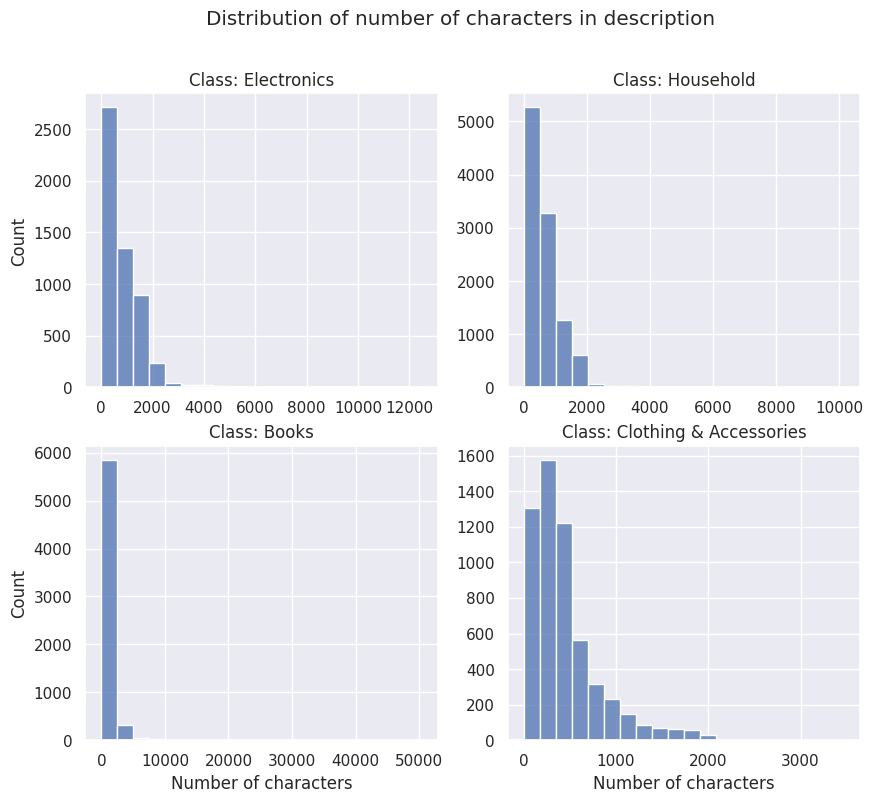

In [13]:
# Distribution of number of characters in description
data_e_char = data_e["description"].str.len()
data_h_char = data_h["description"].str.len()
data_b_char = data_b["description"].str.len()
data_c_char = data_c["description"].str.len()

fig, ax = plt.subplots(2, 2, figsize=(10, 8.4), sharey=False)
sns.histplot(x=data_e_char, bins=20, ax=ax[0, 0]).set_title("Class: Electronics")
sns.histplot(x=data_h_char, bins=20, ax=ax[0, 1]).set_title("Class: Household")
sns.histplot(x=data_b_char, bins=20, ax=ax[1, 0]).set_title("Class: Books")
sns.histplot(x=data_c_char, bins=20, ax=ax[1, 1]).set_title(
    "Class: Clothing & Accessories"
)

fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    (
        ax[i // 2, i % 2].set_xlabel(" ")
        if i // 2 == 0
        else ax[i // 2, i % 2].set_xlabel("Number of characters")
    )
    if i % 2 != 0:
        ax[i // 2, i % 2].set_ylabel(" ")

## Number of Words

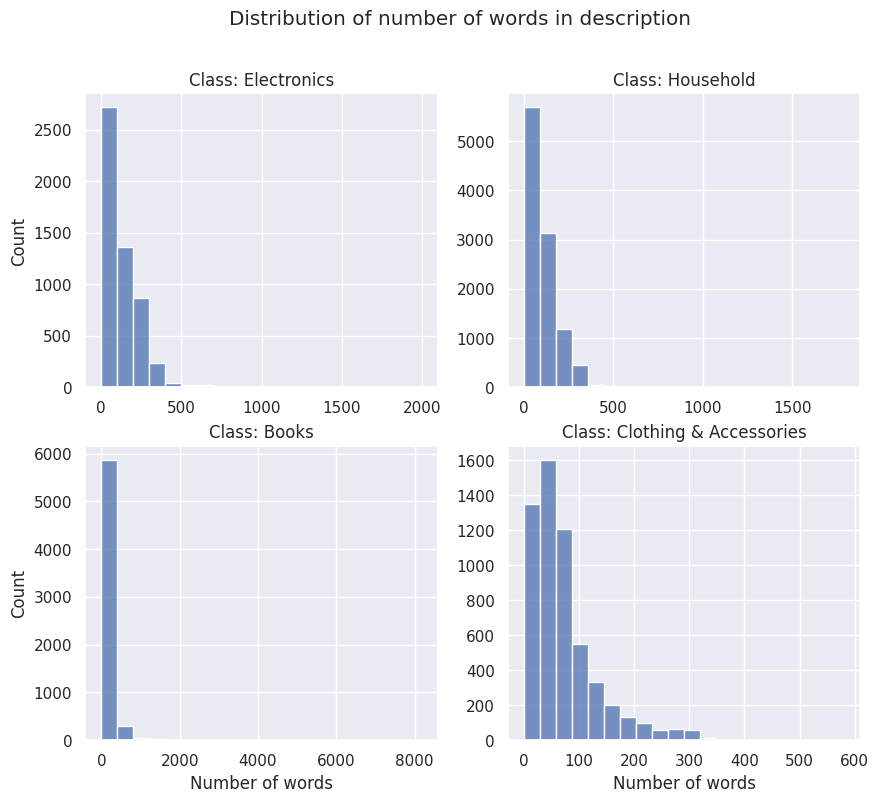

In [14]:
# Distribution of number of words in description
data_e_word = data_e["description"].str.split().map(lambda x: len(x))
data_h_word = data_h["description"].str.split().map(lambda x: len(x))
data_b_word = data_b["description"].str.split().map(lambda x: len(x))
data_c_word = data_c["description"].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize=(10, 8.4), sharey=False)
sns.histplot(x=data_e_word, bins=20, ax=ax[0, 0]).set_title("Class: Electronics")
sns.histplot(x=data_h_word, bins=20, ax=ax[0, 1]).set_title("Class: Household")
sns.histplot(x=data_b_word, bins=20, ax=ax[1, 0]).set_title("Class: Books")
sns.histplot(x=data_c_word, bins=20, ax=ax[1, 1]).set_title(
    "Class: Clothing & Accessories"
)

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    (
        ax[i // 2, i % 2].set_xlabel(" ")
        if i // 2 == 0
        else ax[i // 2, i % 2].set_xlabel("Number of words")
    )
    if i % 2 != 0:
        ax[i // 2, i % 2].set_ylabel(" ")

## Average Word-length

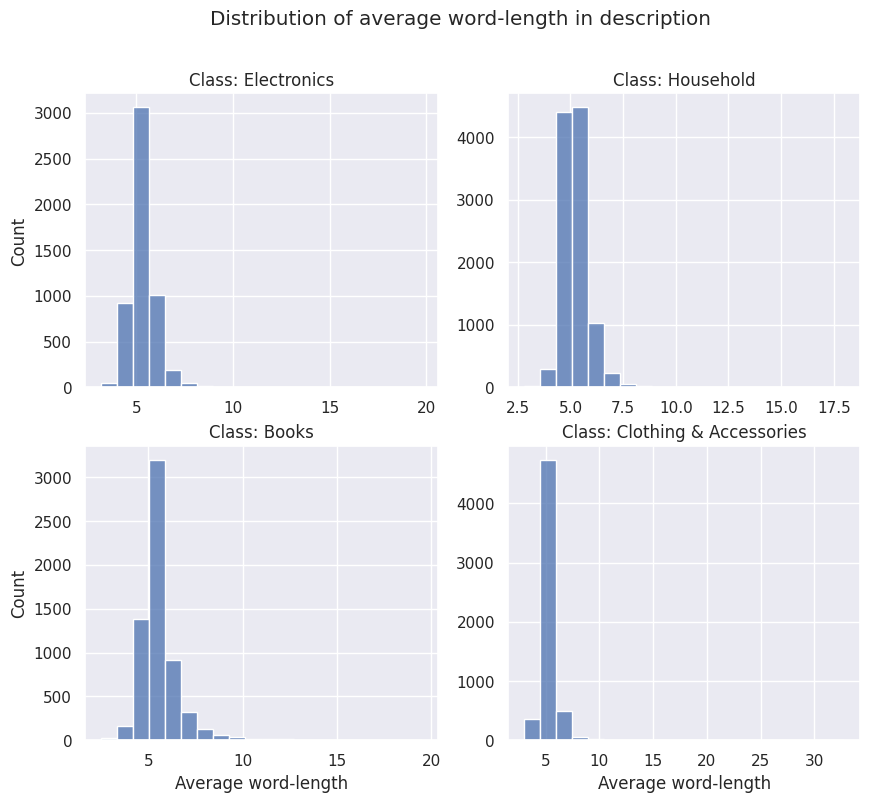

In [15]:
# Distribution of average word-length in description
data_e_avg = (
    data_e["description"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)
data_h_avg = (
    data_h["description"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)
data_b_avg = (
    data_b["description"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)
data_c_avg = (
    data_c["description"]
    .str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)

fig, ax = plt.subplots(2, 2, figsize=(10, 8.4), sharey=False)
sns.histplot(x=data_e_avg, bins=20, ax=ax[0, 0]).set_title("Class: Electronics")
sns.histplot(x=data_h_avg, bins=20, ax=ax[0, 1]).set_title("Class: Household")
sns.histplot(x=data_b_avg, bins=20, ax=ax[1, 0]).set_title("Class: Books")
sns.histplot(x=data_c_avg, bins=20, ax=ax[1, 1]).set_title(
    "Class: Clothing & Accessories"
)

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    (
        ax[i // 2, i % 2].set_xlabel(" ")
        if i // 2 == 0
        else ax[i // 2, i % 2].set_xlabel("Average word-length")
    )
    if i % 2 != 0:
        ax[i // 2, i % 2].set_ylabel(" ")

# Train-Validation-Test Split

In [16]:
# Feature-target split
X, y = data.drop("label", axis=1), data["label"]

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40
)
data_train = pd.concat([X_train, y_train], axis=1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=40
)
data_val, data_test = pd.concat([X_val, y_val], axis=1), pd.concat(
    [X_test, y_test], axis=1
)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ["Training set", "Validation Set", "Test set"]
fig = go.Figure(
    data=[go.Pie(values=values, labels=labels, hole=0.5, textinfo="percent", title=" ")]
)
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(
    height=500, width=800, showlegend=True, title=dict(text=text_title, x=0.5, y=0.95)
)
fig.show()

# Text Normalization

- [**Convertion to Lowercase**](#Convertion-to-Lowercase)
- [**Removal of Whitespaces**](#Removal-of-Whitespaces)
- [**Removal of Punctuations**](#Removal-of-Punctuations)
- [**Removal of Unicode Characters**](#Removal-of-Unicode-Characters)
- [**Substitution of Acronyms**](#Substitution-of-Acronyms)
- [**Substitution of Contractions**](#Substitution-of-Contractions)
- [**Removal of Stop Words**](#Removal-of-Stop-Words)
- [**Spelling Correction**](#Spelling-Correction)
- [**Stemming and Lemmatization**](#Stemming-and-Lemmatization)
- [**Discardment of Non-alphabetic Words**](#Discardment-of-Non-alphabetic-Words)
- [**Retainment of Relevant Parts of Speech**](#Retainment-of-Relevant-Parts-of-Speech)
- [**Removal of Additional Stop Words**](#Removal-of-Additional-Stop-Words)
- [**Integration of the Processes**](#Integration-of-the-Processes)
- [**Implementation on Product Description**](#Implementation-on-Product-Description)

In [17]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

## Convertion to Lowercase

In [18]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()


text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


## Removal of Whitespaces

In [19]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()


text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


## Removal of Punctuations

In [20]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace(
        "'", ""
    )  # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))


text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


## Removal of Unicode Characters

In [21]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)


text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
Output:  Ecommerce Text Classification 


In [22]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)


text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [23]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+"  # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http)  # creating pattern
    return re.sub(pattern, "", text)


text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


## Substitution of Acronyms

In [1]:
# Dictionary of acronyms
acronyms_url = "https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json"
acronyms_dict = pd.read_json(acronyms_url, typ="series")

print(
    "Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict["fyi"])
)

NameError: name 'pd' is not defined

In [25]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns=["acronym", "original"]).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [26]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [27]:
# Function to convert acronyms in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted


text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


## Substitution of Contractions

In [28]:
# Dictionary of contractions
contractions_url = "https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json"
contractions_dict = pd.read_json(contractions_url, typ="series")

print(
    "Example: Original form of the contraction 'aren't' is '{}'".format(
        contractions_dict["aren't"]
    )
)

Example: Original form of the contraction 'aren't' is 'are not'


In [29]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns=["contraction", "original"]).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


In [30]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [31]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted


text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


## Removal of Stop Words

In [32]:
# Stopwords
stops = stopwords.words("english")  # stopwords
addstops = [
    "among",
    "onto",
    "shall",
    "thrice",
    "thus",
    "twice",
    "unto",
    "us",
    "would",
]  # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])


text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


## Spelling Correction

In [34]:
# pyspellchecker
spell = SpellChecker()


def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected


text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


## Stemming and Lemmatization

In [35]:
# Stemming
stemmer = PorterStemmer()


def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem


text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


The stems **introduc**, **lemmat** and **improv** are not actual words. [**Lemmatization**](https://en.wikipedia.org/wiki/Lemmatisation) offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [36]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable=["parser", "ner"])
# lemmatizer = WordNetLemmatizer()


def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    # text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    # return text_wordnet


text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


## Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying tweets into non-disaster and disaster categories. Hence we discard these words.

In [37]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha


text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


## Retainment of Relevant Parts of Speech

In [38]:
# https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [39]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    # keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = [
        "NN",
        "NNS",
        "NNP",
        "NNPS",
        "FW",
        "PRP",
        "PRPS",
        "RB",
        "RBR",
        "RBS",
        "VB",
        "VBD",
        "VBG",
        "VBN",
        "VBP",
        "VBZ",
        "WDT",
        "WP",
        "WPS",
        "WRB",
    ]
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)


text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


For an extensive list of part-of-speech tags, see the [**alphabetical list of part-of-speech tags used in the Penn Treebank Project**](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

## Removal of Additional Stop Words

In [40]:
# Additional stopwords

alphabets = [
    "a",
    "b",
    "c",
    "d",
    "e",
    "f",
    "g",
    "h",
    "i",
    "j",
    "k",
    "l",
    "m",
    "n",
    "o",
    "p",
    "q",
    "r",
    "s",
    "t",
    "u",
    "v",
    "w",
    "x",
    "y",
    "z",
]
prepositions = [
    "about",
    "above",
    "across",
    "after",
    "against",
    "among",
    "around",
    "at",
    "before",
    "behind",
    "below",
    "beside",
    "between",
    "by",
    "down",
    "during",
    "for",
    "from",
    "in",
    "inside",
    "into",
    "near",
    "of",
    "off",
    "on",
    "out",
    "over",
    "through",
    "to",
    "toward",
    "under",
    "up",
    "with",
]
prepositions_less_common = [
    "aboard",
    "along",
    "amid",
    "as",
    "beneath",
    "beyond",
    "but",
    "concerning",
    "considering",
    "despite",
    "except",
    "following",
    "like",
    "minus",
    "onto",
    "outside",
    "per",
    "plus",
    "regarding",
    "round",
    "since",
    "than",
    "till",
    "underneath",
    "unlike",
    "until",
    "upon",
    "versus",
    "via",
    "within",
    "without",
]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = [
    "both",
    "and",
    "either",
    "or",
    "neither",
    "nor",
    "not",
    "only",
    "but",
    "whether",
    "or",
]
subordinating_conjunctions = [
    "after",
    "although",
    "as",
    "as if",
    "as long as",
    "as much as",
    "as soon as",
    "as though",
    "because",
    "before",
    "by the time",
    "even if",
    "even though",
    "if",
    "in order that",
    "in case",
    "in the event that",
    "lest",
    "now that",
    "once",
    "only",
    "only if",
    "provided that",
    "since",
    "so",
    "supposing",
    "that",
    "than",
    "though",
    "till",
    "unless",
    "until",
    "when",
    "whenever",
    "where",
    "whereas",
    "wherever",
    "whether or not",
    "while",
]
others = [
    "ã",
    "å",
    "ì",
    "û",
    "ûªm",
    "ûó",
    "ûò",
    "ìñ",
    "ûªre",
    "ûªve",
    "ûª",
    "ûªs",
    "ûówe",
]
additional_stops = (
    alphabets
    + prepositions
    + prepositions_less_common
    + coordinating_conjunctions
    + correlative_conjunctions
    + subordinating_conjunctions
    + others
)


def remove_additional_stopwords(text):
    return " ".join(
        [word for word in regexp.tokenize(text) if word not in additional_stops]
    )

## Integration of the Processes

In [41]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub("\n", "", text)  # converting text to one line
    text = re.sub("\[.*?\]", "", text)  # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    #     text = pyspellchecker(text)
    text = text_lemmatizer(text)  # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text


text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description


## Implementation on Product Description

In [42]:
%%time
# Implementing text normalization
data_train_norm, data_val_norm, data_test_norm = (
    pd.DataFrame(),
    pd.DataFrame(),
    pd.DataFrame(),
)

data_train_norm["normalized description"] = data_train["description"].apply(
    text_normalizer
)
data_val_norm["normalized description"] = data_val["description"].apply(text_normalizer)
data_test_norm["normalized description"] = data_test["description"].apply(
    text_normalizer
)

data_train_norm["label"] = data_train["label"]
data_val_norm["label"] = data_val["label"]
data_test_norm["label"] = data_test["label"]

data_train_norm

CPU times: user 4min 45s, sys: 783 ms, total: 4min 46s
Wall time: 4min 46s


,normalized description,label
15525,approach acupuncture author author graduate al...,2
1536,nice leatherette office arm chair chair seat h...,1
21984,ekan fedora hat girl boy fedora hat hat man fe...,3
25056,concert showlightning controller lighting cont...,0
25213,marantz fully beltdrive premounted cartridge b...,0
...,...,...
23992,apple tablet inch gb wifi gold matter task pro...,0
27640,skin sticker super hero collection fit dell hp...,0
14501,challenger sale take control customer conversa...,2
14555,mathematics work book opinion class,2


# TF-IDF Model

- [**Text Vectorization**](#Text-Vectorization)
- [**TF-IDF Baseline Modeling**](#TF-IDF-Baseline-Modeling)
- [**TF-IDF Hyperparameter Tuning**](#TF-IDF-Hyperparameter-Tuning)

## Text Vectorization

In order to perform machine learning on text data, we must transform the documents into vector representations. In [**natural language processing**](https://en.wikipedia.org/wiki/Natural_language_processing), **text vectorization** is the process of converting words, sentences, or even larger units of text data to numerical vectors.

In [43]:
# Features and labels
X_train_norm, y_train = (
    data_train_norm["normalized description"].tolist(),
    data_train_norm["label"].tolist(),
)
X_val_norm, y_val = (
    data_val_norm["normalized description"].tolist(),
    data_val_norm["label"].tolist(),
)
X_test_norm, y_test = (
    data_test_norm["normalized description"].tolist(),
    data_test_norm["label"].tolist(),
)

In [44]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range=(1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

## TF-IDF Baseline Modeling

In [45]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=149, n_jobs=-1),
    DecisionTreeClassifier(),
    svm.SVC(kernel="linear"),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(loss="hinge"),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
]

In [46]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names=names, models=models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    (
        score_df["Classifier"],
        score_df["Training accuracy"],
        score_df["Validation accuracy"],
    ) = (names, score_train, score_val)
    score_df.sort_values(by="Validation accuracy", ascending=False, inplace=True)
    return score_df

In [47]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names=names, models=models)

/home/ass-niang/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



,Classifier,Training accuracy,Validation accuracy
6,Ridge Classifier,0.983634,0.953957
5,SGD Classifier,0.967762,0.952878
3,Linear SVM,0.978193,0.952518
0,Logistic Regression,0.966998,0.943885
4,Random Forest,0.999955,0.927338
7,XGBoost,0.962592,0.922662
1,KNN Classifier,0.916101,0.905036
2,Decision Tree,0.999955,0.865468
8,AdaBoost,0.809541,0.786331


## TF-IDF Hyperparameter Tuning

We perform **hyperparameter tuning** on the best performing baseline model.

In [48]:
# # Hyperparameter tuning for linear SVM
# svm_classifier = svm.SVC()
# params_svm = {
#     'kernel': ['linear'],
#     'C': [0.1, 1, 10, 100]
#     # 'C': [0.1, 0.5, 0.7, 0.9, 1.1, 1.3]
# }

# # params_svm = {'C': [0.1, 1, 10, 100, 1000],
# #               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
# #               'kernel': ['linear', 'rbf']}

# best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
# for g in ParameterGrid(params_svm):
#     time_start = time.time()
#     count += 1
#     print(f"Gridpoint #{count}: {g}")
#     svm_classifier.set_params(**g)
#     svm_classifier.fit(X_train_tfidf, y_train)
#     y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
#     score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
#     time_stop = time.time()
#     m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
#     print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
#     print(" ")
#     if score_val > best_score_svm:
#         best_params_svm, best_score_svm = g, score_val

# best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
# best_model_tfidf.set_params(**best_params_tfidf)
# print(f"Best model: {best_model_tfidf}")
# print(" ")
# print(f"Best parameters: {best_params_tfidf}")
# print(f"Best validation accuracy: {best_score_tfidf}")

In [49]:
# Define the model and the adjusted parameter grid
ridge_classifier = RidgeClassifier()
params_ridge = {
    # 'alpha': [0.1, 1, 10, 100],
    "alpha": [0.1, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9],
    "solver": ["auto"],
}

# Initialize variables to track the best model, parameters, and score
best_model_ridge, best_params_ridge, best_score_ridge = None, None, 0

# Iterate over all combinations of the parameter grid
for count, g in enumerate(ParameterGrid(params_ridge), 1):
    time_start = time.time()
    print(f"Gridpoint #{count}: {g}")

    # Set the parameters and fit the model
    ridge_classifier.set_params(**g)
    ridge_classifier.fit(X_train_tfidf, y_train)

    # Make predictions and calculate accuracy scores
    y_train_pred = ridge_classifier.predict(X_train_tfidf)
    y_val_pred = ridge_classifier.predict(X_val_tfidf)
    score_train = accuracy_score(y_train, y_train_pred)
    score_val = accuracy_score(y_val, y_val_pred)

    # Calculate runtime
    time_stop = time.time()
    m, s = divmod(int(time_stop - time_start), 60)
    print(
        f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s\n"
    )

    # Update the best parameters if the current model is better
    if score_val > best_score_ridge:
        best_params_ridge, best_score_ridge = g, score_val

# Train the best model with the best parameters
best_model_tfidf = RidgeClassifier()
best_model_tfidf.set_params(**best_params_ridge)
best_model_tfidf.fit(X_train_tfidf, y_train)

print(f"Best model: {best_model_tfidf}")
print(f"Best parameters: {best_params_ridge}")
print(f"Best validation accuracy: {best_score_ridge}")

Gridpoint #1: {'alpha': 0.1, 'solver': 'auto'}
Training accuracy: 0.9974371655950721, Validation accuracy: 0.9510791366906475, Runtime: 0m6s

Gridpoint #2: {'alpha': 0.5, 'solver': 'auto'}
Training accuracy: 0.9895688143518727, Validation accuracy: 0.9532374100719424, Runtime: 0m3s

Gridpoint #3: {'alpha': 0.7, 'solver': 'auto'}
Training accuracy: 0.9870959039611529, Validation accuracy: 0.9532374100719424, Runtime: 0m2s

Gridpoint #4: {'alpha': 0.9, 'solver': 'auto'}
Training accuracy: 0.985027651634369, Validation accuracy: 0.9539568345323741, Runtime: 0m2s

Gridpoint #5: {'alpha': 1.1, 'solver': 'auto'}
Training accuracy: 0.9823748932152331, Validation accuracy: 0.9539568345323741, Runtime: 0m2s

Gridpoint #6: {'alpha': 1.3, 'solver': 'auto'}
Training accuracy: 0.9800368688458253, Validation accuracy: 0.9543165467625899, Runtime: 0m1s

Gridpoint #7: {'alpha': 1.5, 'solver': 'auto'}
Training accuracy: 0.9786430466256014, Validation accuracy: 0.9535971223021583, Runtime: 0m1s

Gridpoi

# Final Prediction and Evaluation

We employ the model with the highest validation accuracy to predict the labels of the test observations and report the resulting test accuracy and confusion matrix.

In [50]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize=(10, 8), font_scale=1.2, annot_kws_size=16):
    class_names = [
        0,
        1,
        2,
        3,
    ]  # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)  # label size
    plt.title("Confusion Matrix")
    sns.heatmap(
        confusion_matrix_df, annot=True, annot_kws={"size": annot_kws_size}, fmt="d"
    )  # font size
    plt.yticks(tick_marks_y, class_names, rotation="vertical")
    plt.xticks(tick_marks_x, class_names, rotation="horizontal")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.grid(False)
    plt.show()

In [51]:
best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf

Test accuracy    0.94822
 


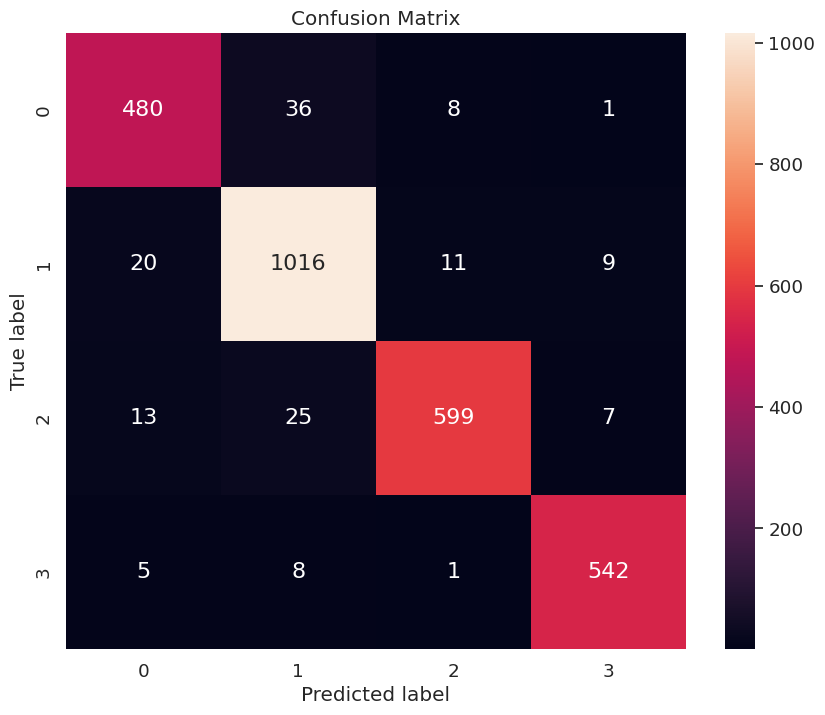

In [52]:
# Prediction and evaluation on test set
best_model.fit(X_train_vec, y_train)
y_test_pred = best_model.predict(X_test_vec)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(
    y_test, y_test_pred, figsize=(10, 8), font_scale=1.2, annot_kws_size=16
)  # Confusion matrix

In [53]:
# Runtime and memory usage
stop = time.time()
print(
    pd.Series(
        {
            "Process runtime": "{:.2f} seconds".format(float(stop - start)),
            "Process memory usage": "{:.2f} MB".format(
                float(process.memory_info()[0] / (1024 * 1024))
            ),
        }
    ).to_string()
)

Process runtime         639.06 seconds
Process memory usage        1228.91 MB


# Export the model

In [147]:
import pickle

pickle_out = open("../models/classifier.pkl", "wb")
pickle.dump(best_model_tfidf, pickle_out)
pickle_out.close()

pickle_out_vect = open("../models/tfidf_vectorizer.pkl", "wb")
pickle.dump(TfidfVec, pickle_out_vect)
pickle_out_vect.close()

In [136]:
test_text, test_label = list(X_test.to_dict()["description"].values())[1], y_test[1]
print("Test text: ", test_text)
print("Test label: ", test_label)

Test text:  Toward a Cognitive Semantics – Typology & Process in Concept Structuring V2 (Language, Speech, and Communication) Review "At last we have all these classic papers in one place! This collection finally makes it possible to appreciate the full scope and originality of Talmy's pioneering work in cognitive linguistics." Ray Jackendoff, Professor of Linguistics, Brandeis University 				    	 					 About the Author Toward a Cognitive Semantics, volume 1, Concept Structuring Systems, and volume 2, Typology and Process in Concept Structuring (MIT Press).
Test label:  2


In [137]:
test_text_norm = text_normalizer(test_text)
test_text_norm

'typology process concept structure language communication review paper place collection finally make appreciate scope originality talmy pioneer work linguistics ray jackendoff professor linguistics brandeis university author volume concept structure system volume typology process concept structure mit press'

In [138]:
TfidfVec = TfidfVectorizer(ngram_range=(1, 1))

X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
test_text_tfidf = TfidfVec.transform([test_text_norm])
test_text_tfidf

<1x56624 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [88]:
test_text_tfidf.shape

(1, 56624)

In [135]:
label_dict

{'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}

In [126]:
predicted_label = best_model.predict(test_text_tfidf)[0]
predicted_label

2

In [150]:
list(label_dict.keys())[predicted_label]

['Electronics', 'Household', 'Books', 'Clothing & Accessories']

In [148]:
pickle_in = open("../models/classifier.pkl", "rb")
classifier = pickle.load(pickle_in)

pickle_in_vect = open("../models/tfidf_vectorizer.pkl", "rb")
tfidf_vectorizer = pickle.load(pickle_in_vect)

In [149]:
test_text, test_label = list(X_test.to_dict()["description"].values())[1], y_test[1]
print("Test text: ", test_text)
print("Test label: ", test_label)

test_text_norm = text_normalizer(test_text)

test_text_tfidf = tfidf_vectorizer.transform([test_text_norm])

predicted_label_index = classifier.predict(test_text_tfidf)[0]

predicted_label = list(label_dict.keys())[predicted_label_index]
predicted_label

Test text:  Toward a Cognitive Semantics – Typology & Process in Concept Structuring V2 (Language, Speech, and Communication) Review "At last we have all these classic papers in one place! This collection finally makes it possible to appreciate the full scope and originality of Talmy's pioneering work in cognitive linguistics." Ray Jackendoff, Professor of Linguistics, Brandeis University 				    	 					 About the Author Toward a Cognitive Semantics, volume 1, Concept Structuring Systems, and volume 2, Typology and Process in Concept Structuring (MIT Press).
Test label:  2


'Books'